Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_squared_error,classification_report

In [15]:
#Read data
df = pd.read_csv('Company_Data (2).csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

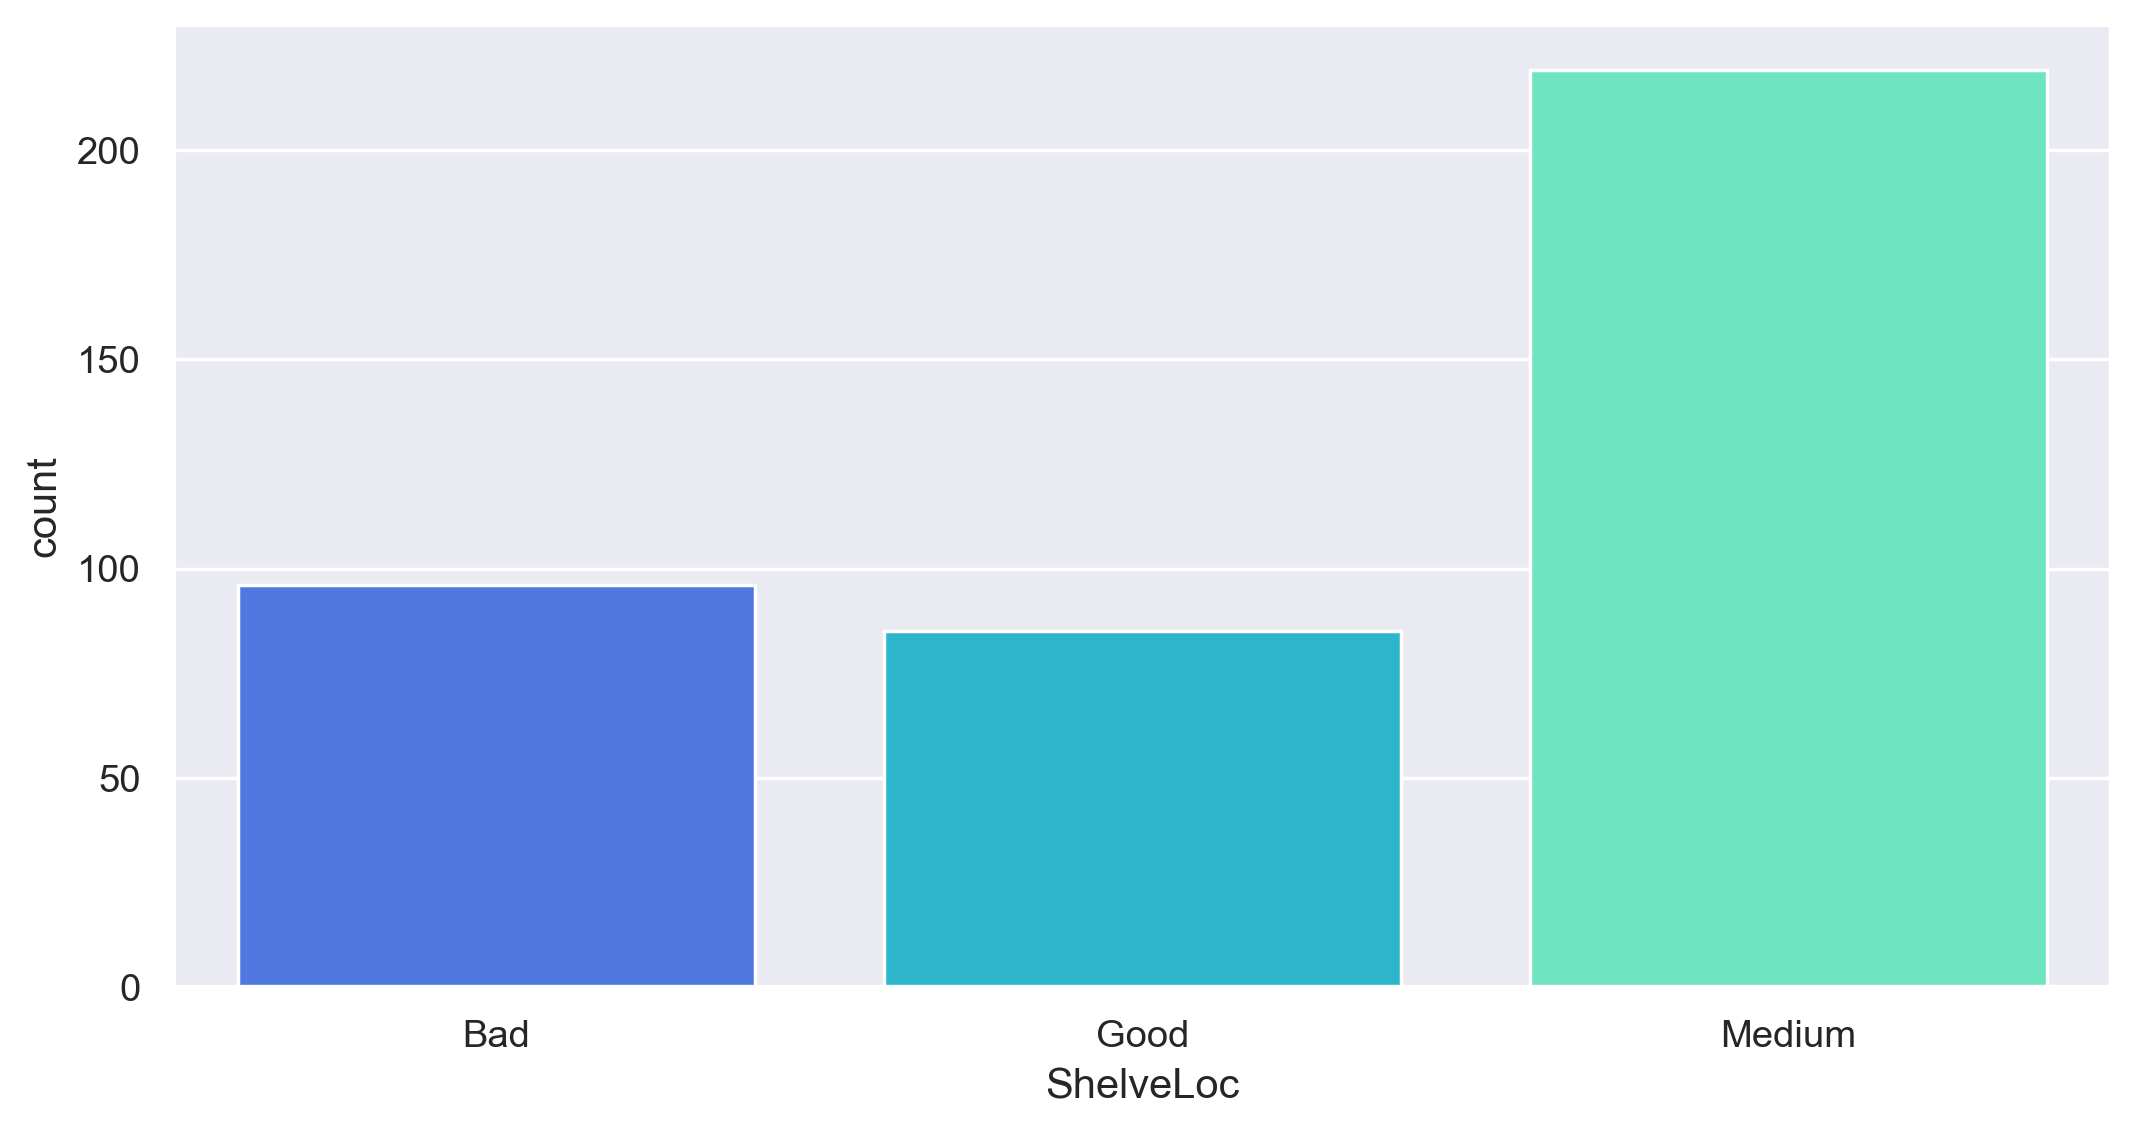

In [5]:
sns.countplot(df['ShelveLoc'])

In [18]:
#Encoding the categorical values into numerical using get_dummies
df = pd.get_dummies(df, columns=['ShelveLoc','Urban','US'], drop_first=True)

In [19]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


# Model building

In [20]:
x = df.iloc[:,1:]
y = df['Sales']

In [21]:
#splitting training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [22]:
#model building

rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [23]:
#checking accuracy, MSE and RMSE values of the model

print(f"R2 value {r2_score(ytest,ypred)}")
print(f"MSE {mean_squared_error(ytest,ypred)}")
print(f"RMSE {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 value 0.6867717175457768
MSE 3.0997705069999975
RMSE 1.7606165133270781


[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nsquared_error = 7.292\nsamples = 201\nvalue = 7.137'),
 Text(0.25, 0.625, 'Age <= 49.5\nsquared_error = 5.339\nsamples = 158\nvalue = 6.457'),
 Text(0.125, 0.375, 'Advertising <= 7.5\nsquared_error = 5.194\nsamples = 64\nvalue = 7.556'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Price <= 132.5\nsquared_error = 4.077\nsamples = 94\nvalue = 5.718'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Price <= 135.0\nsquared_error = 5.863\nsamples = 43\nvalue = 9.856'),
 Text(0.625, 0.375, 'Price <= 74.5\nsquared_error = 4.264\nsamples = 36\nvalue = 10.437'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Income <= 107.0\nsquared_error = 2.84\nsamples = 7\nvalue = 6.72'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

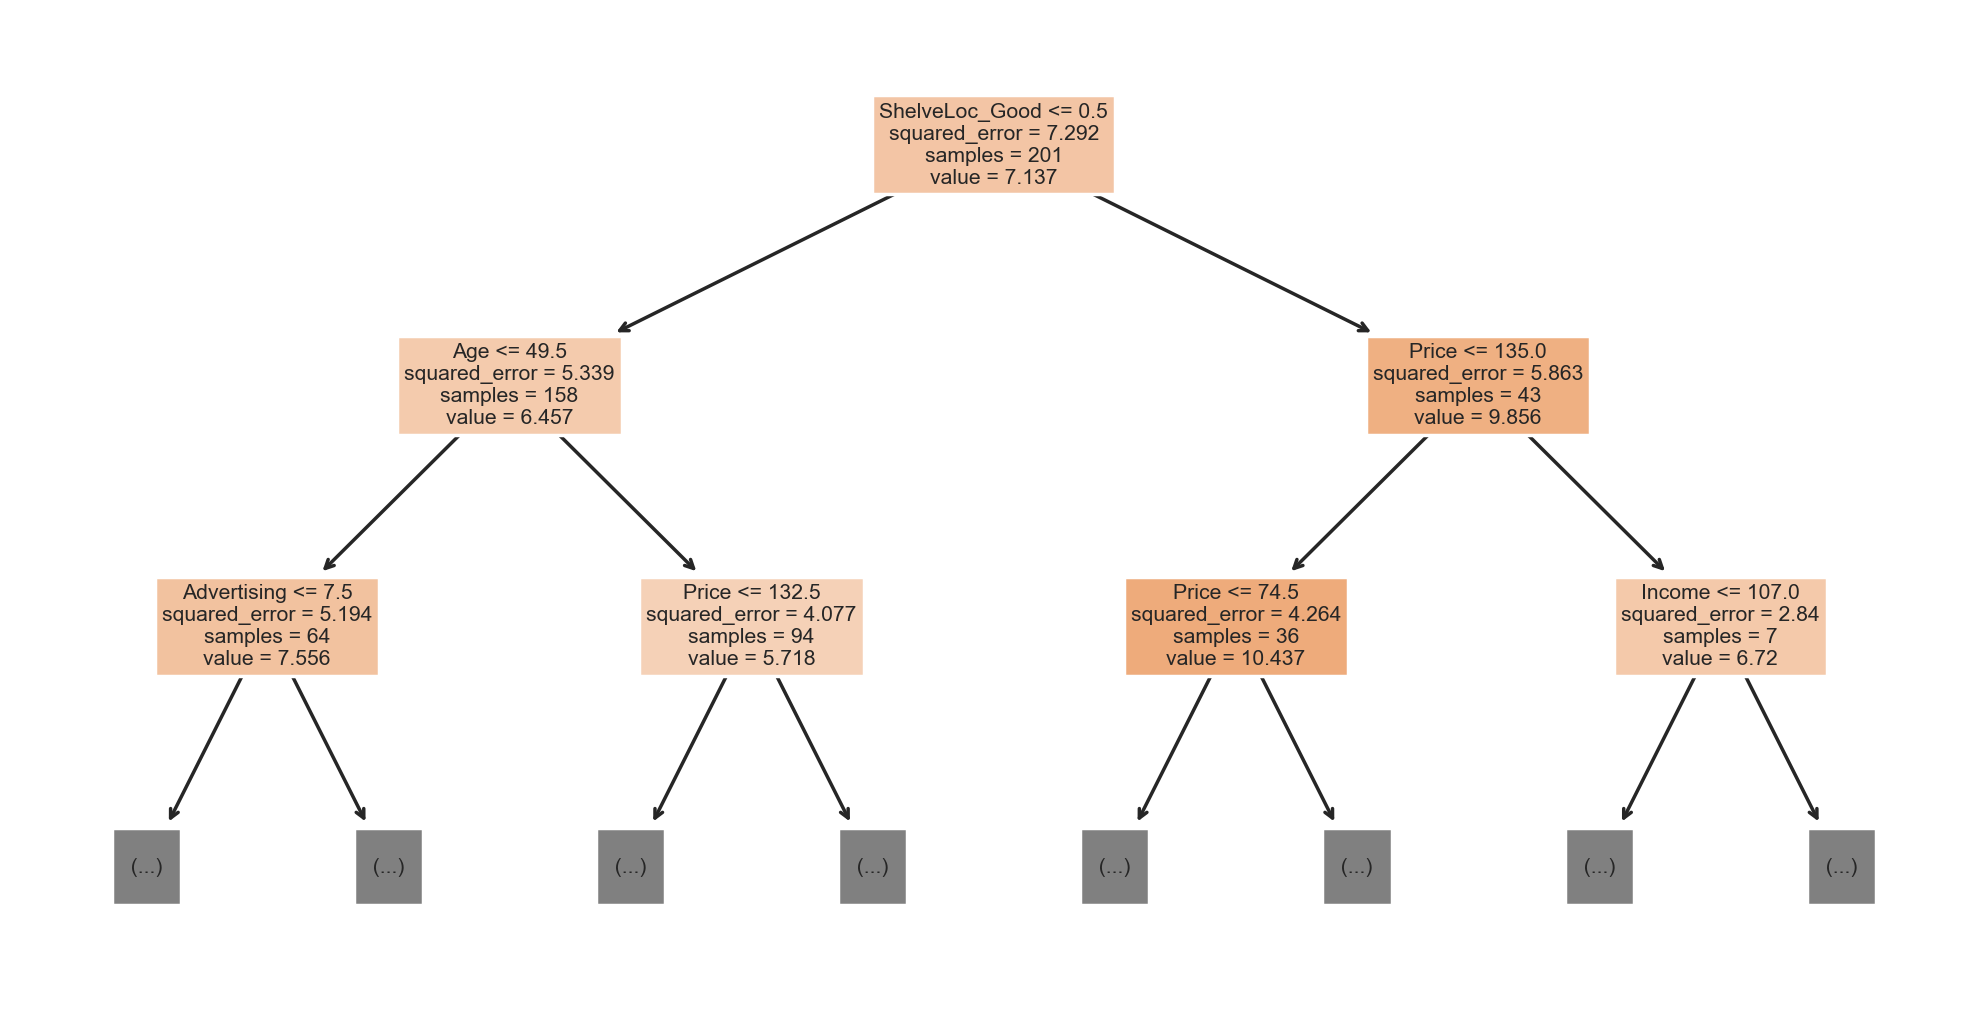

In [24]:
#visualize rf

tree.plot_tree(rf.estimators_[0], feature_names=x.columns, filled=True, max_depth=2)

# Feature Importance Analysis

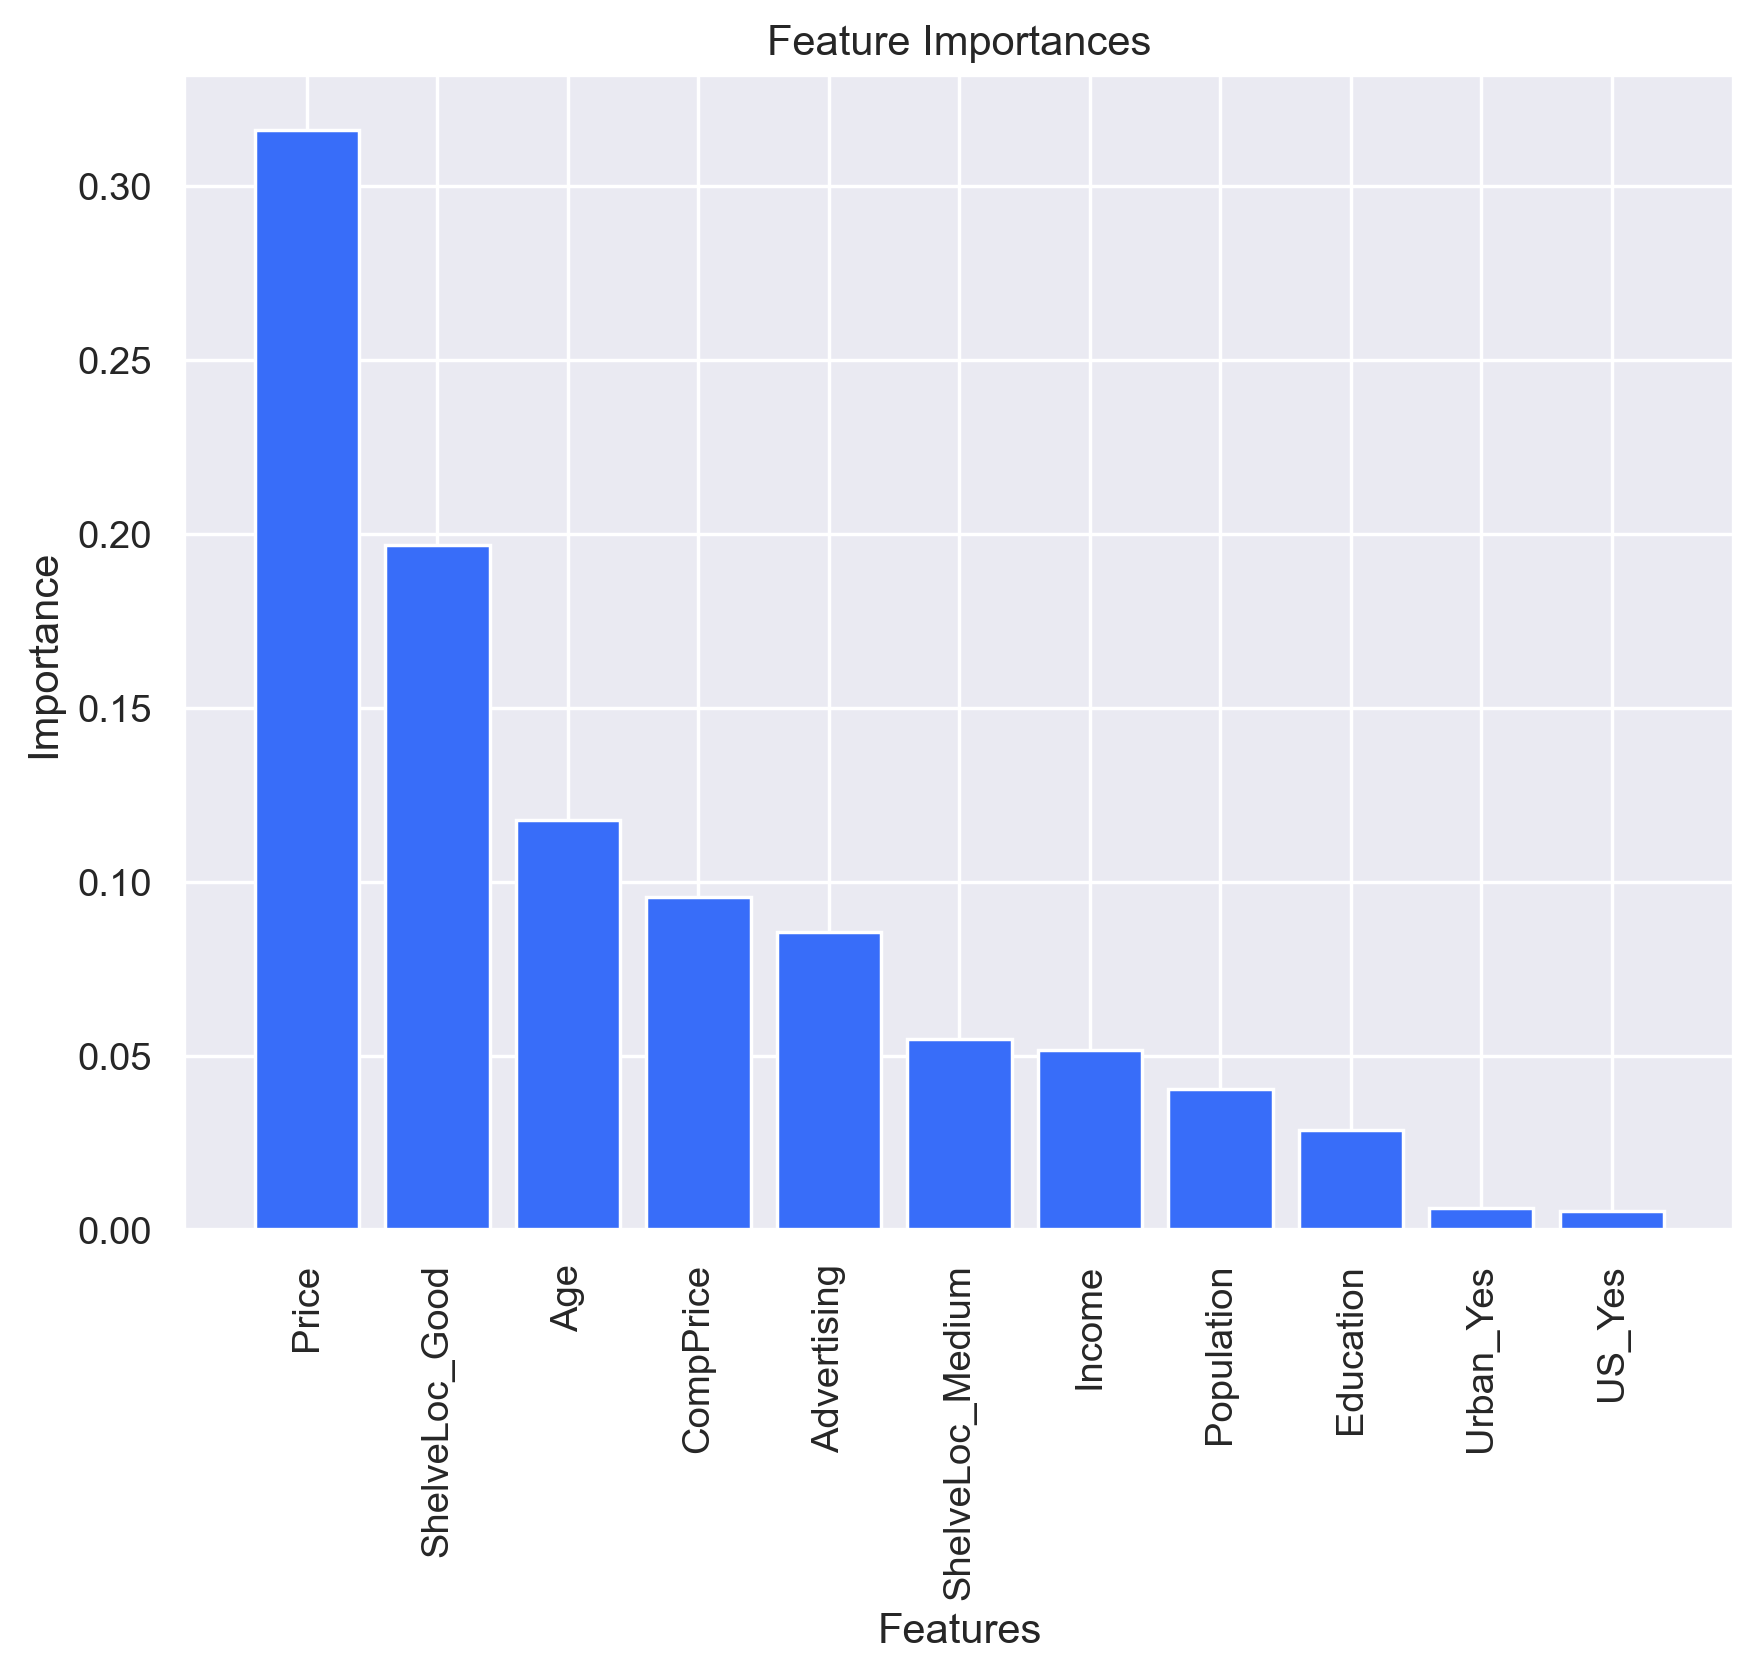

,Feature,Importance
4,Price,0.315919
7,ShelveLoc_Good,0.196699
5,Age,0.117808
0,CompPrice,0.095835
2,Advertising,0.085677
8,ShelveLoc_Medium,0.055032
1,Income,0.051734
3,Population,0.040473
6,Education,0.028800
9,Urban_Yes,0.006523


In [25]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df['Feature'] = importance_df['Feature'].astype(str)


# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()
importance_df